In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [2]:
import qeds
qeds.themes.mpl_style();

In [3]:
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
df_legend = pd.read_excel('./mpd2018.xlsx',sheet_name='Legend')
df_legend.rename(columns={'Maddison Project Database (MPD) 2018':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [5]:
df_legend

{'Full data': 'Data in  single table',
 'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'year': 'Year',
 'cgdppc': 'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)',
 'rgdpnapc': 'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)',
 'pop': 'Population, mid-year (thousands)',
 'i_cig': '0/1/2: observation is extrapolated (0), benchmark (1), or interpolated (2)',
 'i_bm': 'For benchmark observations: 1: ICP PPP estimates, 2: Historical income benchmarks, 3: Real wages and urbanization, 4: Multiple of subsistence, 5: Braithwaite (1968) PPPs',
 'Partial countries': 'Data for selected sub-national units with long time series'}

In [6]:
df = pd.read_excel('./mpd2018.xlsx',sheet_name='Full data')

In [7]:
country_list = ['GBR','USA','JPN','CHN','IND']
df2 = df[df.countrycode.isin(country_list)]

In [8]:
df2.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
2858,CHN,China,1,NaN,NaN,59600.0,NaN,NaN
2859,CHN,China,1000,NaN,NaN,59000.0,NaN,NaN
2860,CHN,China,1500,NaN,NaN,103000.0,NaN,NaN
2861,CHN,China,1600,NaN,NaN,160000.0,NaN,NaN
2862,CHN,China,1661,940.0,1083.0,NaN,Extrapolated,NaN


In [9]:
sns.set_style('whitegrid')

In [10]:
colors.remove('#fec630')

In [11]:
def plot_graphs(df2,country_list,filename,source,locs,loc_all):
    color_list = dict(zip(country_list,colors[:len(country_list)]))
    fig,ax = plt.subplots()
    sns.lineplot(x='year',y='cgdppc',hue='countrycode',linewidth=2,
                 palette=color_list,legend=False,data=df2)
    for i,country in enumerate(country_list):
        df3 = df2[df2.countrycode==country]
        label = df3.country.unique()[0]
        #loc_ = (2020,df3[df3.year==2016].cgdppc) if label != 'Japan' else (2020,df3[df3.year==2016].cgdppc-1000)
        ax.annotate(label,locs[country],color=colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita');
    #ax.legend(loc='upper left',frameon=False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.text(loc_all[0],loc_all[1],source)
    plt.savefig(filename,bbox_inches='tight')

In [12]:
year_x = 2020
year_y = 2016
locs = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
locs['JPN'] = (locs['JPN'][0],locs['JPN'][1]-1000)

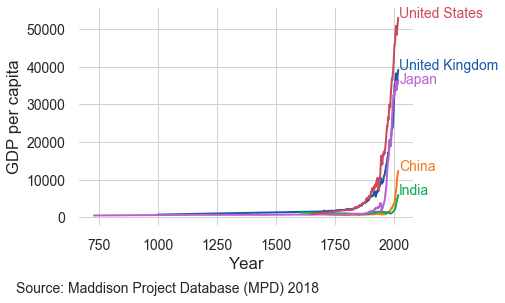

In [13]:
plot_graphs(df2,country_list,'gdp_per_capita_time.svg','Source: Maddison Project Database (MPD) 2018',locs,(400,-20000))

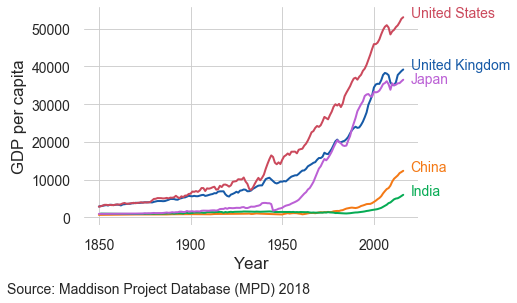

In [14]:
plot_graphs(df2[df2.year >= 1850],country_list,'gdp_per_capita_time_recent.svg','Source: Maddison Project Database (MPD) 2018',locs,(1800,-20000))

In [15]:
year_x = 2016
year_y = 2016
locs3 = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
#locs3['JPN'] = (locs3['JPN'][0],locs3['JPN'][1]-1000)

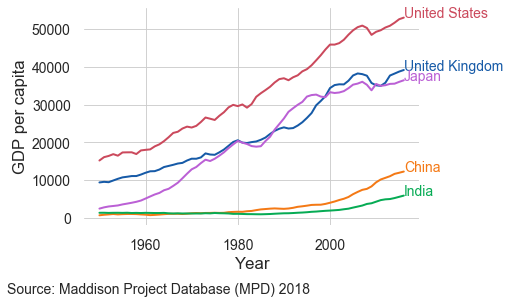

In [16]:
plot_graphs(df2[df2.year >= 1950],country_list,'gdp_per_capita_india_china_focus.svg',
            'Source: Maddison Project Database (MPD) 2018',locs3,(1930,-20000))

In [17]:
year_x = 1855
year_y = 1850
locs2 = {country : (year_x,df2[(df2.countrycode==country)&(df2.year==year_y)].cgdppc.values[0]) for country in country_list}
locs2['IND'] = (1830,df2[(df2.countrycode=='IND')&(df2.year==1841)].cgdppc.values[0]+100)
locs2['GBR'] = (1700,df2[(df2.countrycode=='GBR')&(df2.year==1700)].cgdppc.values[0]+450)
locs2['USA'] = (1740,df2[(df2.countrycode=='USA')&(df2.year==1720)].cgdppc.values[0])

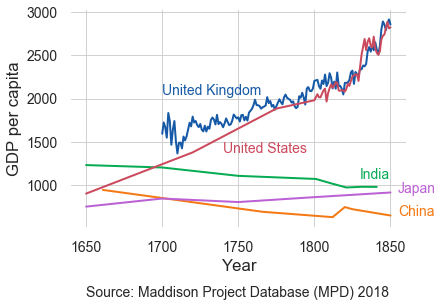

In [18]:
plot_graphs(df2[(df2.year >= 1650) & (df2.year <=1850)],
            country_list,'gdp_per_capita_1650_1850.svg',
            'Source: Maddison Project Database (MPD) 2018',locs2,(1650,-300))

In [19]:
import statsmodels.api as sm

In [20]:
df2.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
2858,CHN,China,1,NaN,NaN,59600.0,NaN,NaN
2859,CHN,China,1000,NaN,NaN,59000.0,NaN,NaN
2860,CHN,China,1500,NaN,NaN,103000.0,NaN,NaN
2861,CHN,China,1600,NaN,NaN,160000.0,NaN,NaN
2862,CHN,China,1661,940.0,1083.0,NaN,Extrapolated,NaN


In [84]:
GBR = df2[df2.countrycode=='GBR'].set_index('year').cgdppc.dropna()

In [85]:
cycle, trend = sm.tsa.filters.hpfilter(GBR.loc[1900:],1600)

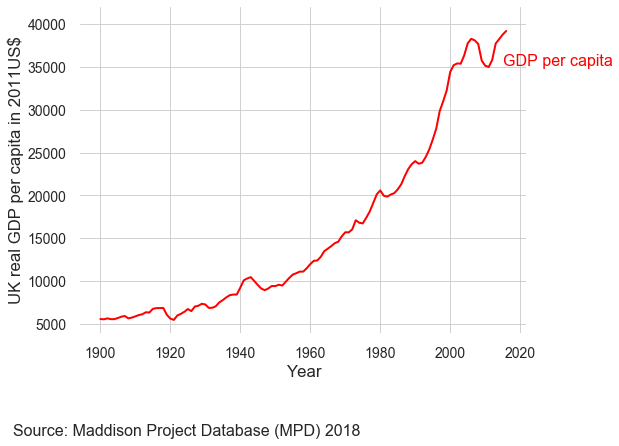

In [87]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(GBR.loc[1900:],'r',linewidth=2,label='GDP per capita')
#ax.plot(trend,'k',linewidth=2, label='Trend')
#ax.legend(loc='upper left',frameon=False)
ax.annotate('GDP per capita',(2015,GBR.loc[2010]),color='r',fontsize=16)
#ax.annotate('Trend',(1970,GBR.loc[1990]),color='k',fontsize=16)
ax.set_ylim(ymin = 4000,ymax=42000)
ax.set_ylabel('UK real GDP per capita in 2011US$')
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Year')
plt.text(1875,-8000,'Source: Maddison Project Database (MPD) 2018',fontsize=16)
plt.savefig('UK-gdp.svg',bbox_inches='tight')


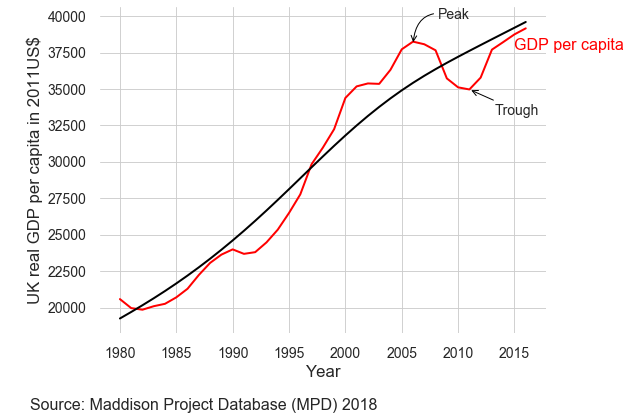

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(GBR.loc[1980:],'r',linewidth=2,label='GDP per capita')
ax.plot(trend.loc[1980:],'k',linewidth=2, label='Trend')
#ax.legend(loc='upper left',frameon=False)
ax.annotate('GDP per capita',(2015,GBR.loc[2013]),color='r',fontsize=16)
ax.annotate('Trend',(1970,GBR.loc[1990]),color='k',fontsize=16)
ax.set_ylabel('UK real GDP per capita in 2011US$')
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Year')
ax.annotate(
    "Peak", xy=(2006, GBR.loc[2007]), xycoords="data",
    xytext=(25, 25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
    "Trough", xy=(2011, GBR.loc[2011]), xycoords="data",
    xytext=(25, -25), textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='k'))
plt.text(1972,13000,'Source: Maddison Project Database (MPD) 2018',fontsize=16)
plt.savefig('UK-gdp-trend_recession.svg',bbox_inches='tight')

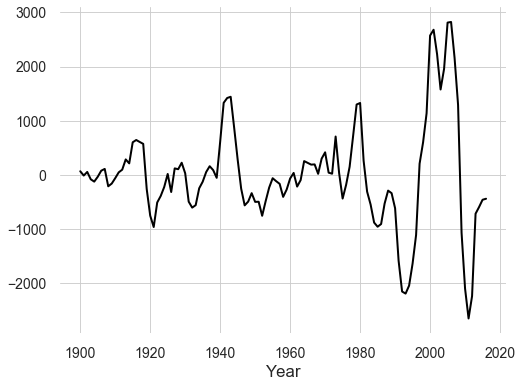

In [30]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(cycle,'k',linewidth=2)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('Year')
#plt.text(1875,-4500,'Source: Maddison Project Database (MPD) 2018',fontsize=16)
plt.savefig('UK-gdp-cycle.svg',bbox_inches='tight')

In [26]:
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# years_select = np.arange(1910,2020,10)
# df3 = df[(df.year.isin(years_select)) & (df.cgdppc > 0)].copy()
# df3['Daily GDP per cap'] = np.log(df3.cgdppc/365)
# df3=df3[df3['Daily GDP per cap']<=6]

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(years_select.shape[0], rot=-.25, light=.7)
# g = sns.FacetGrid(df3, row="year", hue="year", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, 'Daily GDP per cap', clip_on=False, shade=True, alpha=1)
# g.map(sns.kdeplot, 'Daily GDP per cap', clip_on=False, color="w")
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, 'Daily GDP per cap')

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.55)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

In [27]:
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# years_select = np.arange(1910,2020,10)
# df3 = df[(df.year.isin(years_select)) & (df.cgdppc > 0)].copy()
# df3['log GDP per cap'] = np.log(df3.cgdppc)
# df3[df3['log GDP per cap']<=12]

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(years_select.shape[0], rot=-.25, light=.7)
# g = sns.FacetGrid(df3, row="year", hue="year", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, 'log GDP per cap', clip_on=False, shade=True, alpha=1)
# g.map(sns.kdeplot, 'log GDP per cap', clip_on=False, color="w")
# g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, 'log GDP per cap')

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.55)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

In [3]:
unemp = pd.read_csv('./UNRTUKA.csv')
cpi = pd.read_csv('./cpi.csv')
inflation = pd.read_csv('./inflation.csv')

In [4]:
df = unemp.set_index('DATE').copy()
df=df.join(inflation.set_index('DATE'))
df.columns = ['Unemployment Rate','Inflation Rate']
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

In [7]:
df['Inflation Rate'].plot(kind='line')

In [8]:
df['decade']=(df.index.year - df.index.year % 10).values

In [9]:
for i,decade in enumerate(df.decade.unique()):
    data = df[df.decade==decade]
    plt.scatter(data['Inflation Rate'],data['Unemployment Rate'],color=colors[i],label=decade)
plt.legend(loc='best')

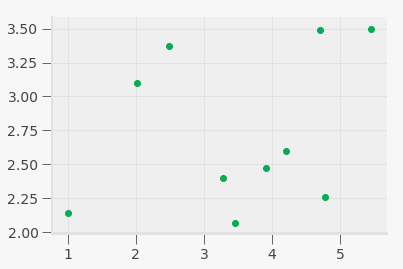

In [23]:
decade = 1960
data = df[df.decade==decade]
plt.scatter(data['Inflation Rate'],data['Unemployment Rate'],color=colors[i],label=decade)

In [4]:
data_legend = {'CPILFESL':'Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average',
              'CPIAUCSL':'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
              'UNRATE':'Unemployment Rate',
              'UNRATENSA':'Unemployment Rate, not seasonally adjusted',
              'AURUKM':'Unemployment Rate in the United Kingdom',
              'LMUNRRTTGBM156N':'Registered Unemployment Rate for the United Kingdom',
              'GBRCPIALLMINMEI':'Consumer Price Index of All Items in the United Kingdom'}

In [5]:
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2019, 12, 31)

df = web.DataReader(list(data_legend.keys()), 'fred', start, end)
df_A =  df.resample('A').mean()


In [44]:
df['Decade'] = df.index.year - df.index.year % 10
df_A['Decade'] = df_A.index.year - df_A.index.year % 10
df_A['Decade'] = df_A.Decade.map(lambda x: f'{x}s')

In [7]:
df_A['Inflation Rate']=df_A['CPIAUCSL'].pct_change()

In [16]:
df_A.rename(columns={'UNRATE':'Unemployment Rate'},inplace=True)

In [48]:
colors_dict = dict(zip(df_A.Decade.unique(),colors))

In [45]:
decades = df_A.Decade.unique()

In [49]:
decades

array(['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'], dtype=object)

In [62]:
for i,decade in enumerate(decades):
    select = df_A.Decade.map(lambda x: x in decades[:i+1])
    sns.lmplot(x='Unemployment Rate',y='Inflation Rate',hue='Decade',height=8,aspect=1,
           truncate=True,palette=colors_dict,ci=None,data=df_A[select])
    sns.despine(left='off',bottom='off')
    plt.ylim(ymin=-0.02,ymax=.13)
    plt.xlim(xmin=3,xmax=11)
    plt.text(3,-.04,'Source: Consumer price index for all urban consumers (BLS) and own calculations',fontsize=14)
    plt.text(3,-.045,'Unemployment Rate (BLS)',fontsize=14)
    plt.savefig(f'./philips_curve_{decade}.svg',bbox_inches='tight')
    plt.close()

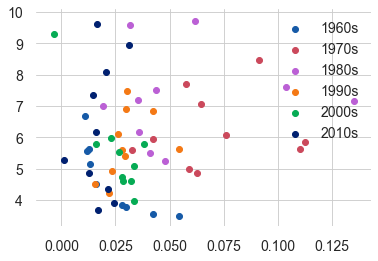

In [44]:
fig,ax = plt.subplots()
for i,decade in enumerate(df_A.Decade.unique()):
    data = df_A[df_A.Decade==decade]
    ax.scatter(data['Inflation Rate'],data['UNRATE'],color=colors[i],label=f'{decade}s')
ax.legend(loc='best',frameon=False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)



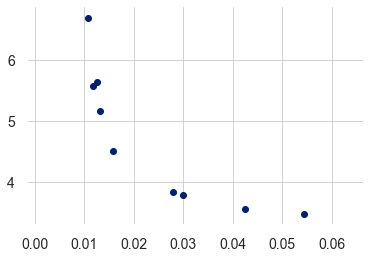

In [45]:
fig,ax = plt.subplots()
decade = 1960
data = df_A[df_A.Decade==decade]
ax.scatter(data['Inflation Rate'],data['UNRATE'],color=colors[i],label=decade)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

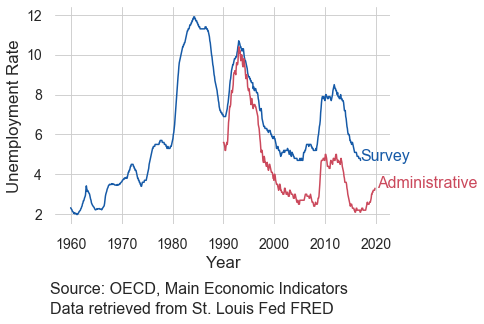

In [46]:
fig,ax = plt.subplots()
ax.plot(df['AURUKM'],color=colors[0],label='Survey')
ax.plot(df['LMUNRRTTGBM156N'],colors[1],label='Registered')
ax.annotate('Survey',
             (df.index[683], df['AURUKM'][683]),
             xytext=(0, 0),
             color=colors[0],
             fontsize=16,
             textcoords='offset points')
ax.annotate('Administrative',
             (df.index[717], df['LMUNRRTTGBM156N'][717]),
             xytext=(2, 0),
             color=colors[1],
             fontsize=16,
             textcoords='offset points')
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate')
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.text(714010,-2,'Source: OECD, Main Economic Indicators',fontsize=16)
plt.text(714010,-3,'Data retrieved from St. Louis Fed FRED', fontsize=16)
plt.savefig('UK-unemployment.svg',bbox_inches='tight')

In [52]:
data_annual={'CPIUKA':'Consumer Price Index in the United Kingdom',
            'CPGRLE01GBA659N':'Consumer Price Index: OECD Groups: All Items Non-Food and Non-Energy for the United Kingdom'}

In [71]:
inflation = web.DataReader('CPGRLE01GBA659N', 'fred', datetime.datetime(1960, 1, 1), end)

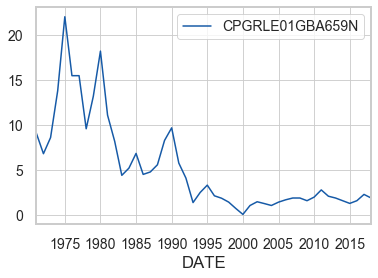

In [72]:
inflation.plot()

In [63]:
real_wage = pd.read_csv('./real-wage.csv')

In [64]:
select = ((real_wage.Series =='In 2018 constant prices at 2018 USD PPPs' ))

In [65]:
real_wage = real_wage[select][['Country','Time','Value']].reset_index(drop=True)

In [66]:
def normalize(group):
    x = group[group.Time==2007].Value.values
    df = group.copy()
    df['Value'] = df.Value/x
    return df[['Time','Value']]

In [67]:
wage_index = real_wage.groupby('Country').apply(normalize).reset_index().drop('level_1',axis=1)

In [68]:
countries = wage_index.Country.unique()
colors = ['k']*len(countries)
country_color = dict(zip(countries,colors))
colors_=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_.remove('#fec630')

In [69]:
country_select = ['Greece','United Kingdom','United States','France','Germany','Poland']
for i,country in enumerate(country_select):
    country_color[country]=colors_[i]

In [70]:
sns.set_style('whitegrid')
sns.despine(bottom=False, left=False)

<Figure size 432x288 with 0 Axes>

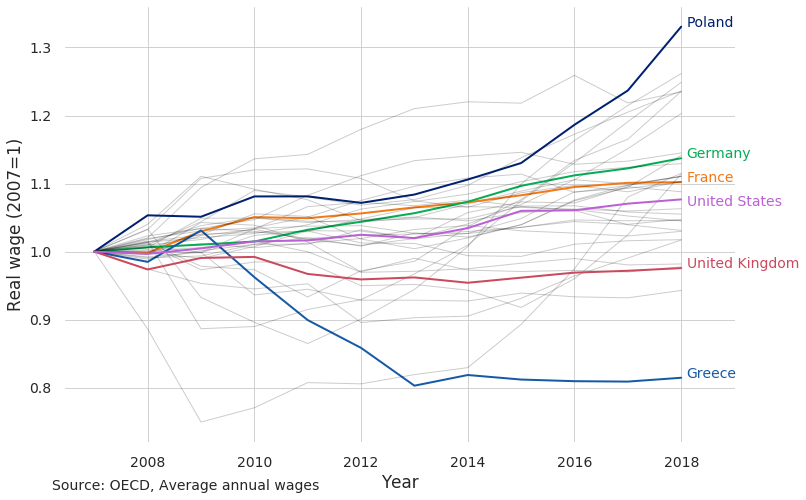

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
for country in countries:
    data = wage_index[(wage_index.Country==country) &(wage_index.Time>=2007)]
    alpha_ = .2 if country not in country_select else 1
    color_ = country_color[country]
    linewidth_ = 2 if country in country_select else 1
    last_ = (data[data.Time==2018].Value.values if country != 'United States' 
             else data[data.Time==2018].Value.values -.01)
    ax.plot(data['Time'],data['Value'],color=color_,alpha=alpha_,linewidth=linewidth_)
    if country in country_select:
        plt.annotate(country,(2018.1,last_),color=country_color[country]);        
ax.set_xlabel('Year');
ax.set_ylabel('Real wage (2007=1)');
ax.set_xlim(xmax=2019);
#ax.set_title('Real wage growth')
ax.text(2006.2,.65,'Source: OECD, Average annual wages');
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
plt.savefig('./real_wages.svg',bbox_inches='tight')

In [74]:
gov = pd.read_csv('./gov.csv')

In [75]:
gov.head()

,COU,Country,IND,Indicator,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,GGD_GDP,General government gross debt as a percentage ...,2007,2007,13.37,NaN,NaN
1,AUS,Australia,GGD_GDP,General government gross debt as a percentage ...,2008,2008,15.64,NaN,NaN
2,AUS,Australia,GGD_GDP,General government gross debt as a percentage ...,2009,2009,21.19,NaN,NaN
3,AUS,Australia,GGD_GDP,General government gross debt as a percentage ...,2010,2010,23.93,NaN,NaN
4,AUS,Australia,GGD_GDP,General government gross debt as a percentage ...,2011,2011,29.00,NaN,NaN


In [76]:
gov.Indicator.unique()

array(['General government gross debt as a percentage of GDP',
       'General government fiscal balance as a percentage of GDP',
       'General government revenues as a percentage of GDP',
       'General government expenditures as a percentage of GDP'],
      dtype=object)

In [77]:
gov.IND.unique()

array(['GGD_GDP', 'GNLB_GDP', 'GTR_GDP', 'GTE_GDP'], dtype=object)

In [78]:
gov[gov.IND=='GTR_GDP']

,COU,Country,IND,Indicator,YEAR,Year,Value,Flag Codes,Flags
427,IND,India,GTR_GDP,General government revenues as a percentage of...,2007,2007,21.96,NaN,NaN
428,IND,India,GTR_GDP,General government revenues as a percentage of...,2008,2008,19.71,NaN,NaN
429,IND,India,GTR_GDP,General government revenues as a percentage of...,2009,2009,18.52,NaN,NaN
430,IND,India,GTR_GDP,General government revenues as a percentage of...,2010,2010,18.82,NaN,NaN
431,IND,India,GTR_GDP,General government revenues as a percentage of...,2011,2011,19.29,NaN,NaN
432,IND,India,GTR_GDP,General government revenues as a percentage of...,2012,2012,19.81,NaN,NaN
433,IND,India,GTR_GDP,General government revenues as a percentage of...,2013,2013,19.60,NaN,NaN
434,IND,India,GTR_GDP,General government revenues as a percentage of...,2014,2014,19.15,NaN,NaN
435,IND,India,GTR_GDP,General government revenues as a percentage of...,2015,2015,19.85,NaN,NaN
436,IND,India,GTR_GDP,General government revenues as a percentage of...,2016,2016,20.15,NaN,NaN


In [79]:
countries = gov.Country.unique()
colors = ['k']*len(countries)
country_color = dict(zip(countries,colors))
colors_=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_.remove('#fec630')

In [80]:
country_select = ['Greece','United Kingdom','United States','France','Germany','Poland','India']
for i,country in enumerate(country_select):
    country_color[country]=colors_[i]

In [81]:
sns.set_style('whitegrid')
sns.despine(bottom=False, left=False,right=False,top=False)

<Figure size 432x288 with 0 Axes>

In [82]:
data = gov[(gov.Year>=2007) & (gov.IND=='GTE_GDP')][['COU','Country','Year','Value']]

In [83]:
data.rename(columns={'Value':'Expenditures'},inplace=True)

In [84]:
data2 = gov[(gov.Year>=2007) & (gov.IND=='GTR_GDP')][['COU','Country','Year','Value']]

In [85]:
data2.rename(columns={'Value':'Revenues'},inplace=True)

In [86]:
df = data.merge(data2,on=['COU','Country','Year'])

In [87]:
df.sort_values(['Country','Year'],inplace=True)

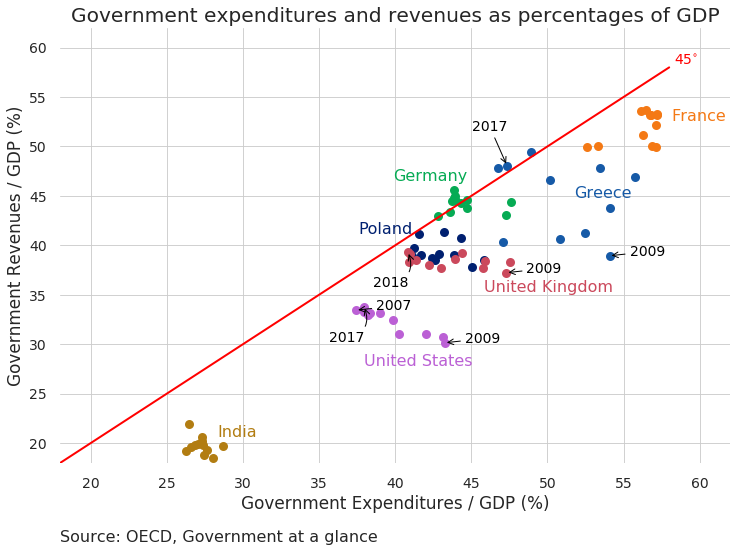

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
for country in countries:
    df2 = df[(df.Country==country)]
    alpha_ = .2 if country not in country_select else 1
    color_ = country_color[country]
    linewidth_ = 3 if country in country_select else 1
#     elif country == 'United Kingdom':
#         last_ = data[data.Year==2018].Value.values -1
#     else:
#         last_ = data[data.Year==2018].Value.values 
  
    if country in country_select:
        if country == 'India':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (1,0)
        elif country == 'United States':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (0,-6)
            ax.annotate("2017", xy=df2.loc[df2.Year==2017][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(-35, -35), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6",color='k'))
            ax.annotate("2007", xy=df2.loc[df2.Year==2007][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(20, 0), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->",color='k'))
            ax.annotate("2009", xy=df2.loc[df2.Year==2009][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(20, 0), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->",color='k'))


        elif country == 'United Kingdom':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (5,-4) 
            ax.annotate("2018", xy=df2.loc[df2.Year==2018][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(-35, -35), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.6",color='k'))
            ax.annotate("2009", xy=df2.loc[df2.Year==2009][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(20, 0), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->",color='k'))

        elif country == 'Poland':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (-4,0) 
        elif country == 'Germany':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (-4,1)   
        elif country == 'Greece':
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values + (5,-3)
            ax.annotate("2017", xy=df2.loc[df2.Year==2017][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(-35, 35), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->",color='k'))
            ax.annotate("2009", xy=df2.loc[df2.Year==2009][['Expenditures','Revenues']].values[0], xycoords="data",
               xytext=(20, 0), textcoords="offset points",color='k',
               arrowprops=dict(arrowstyle="->",color='k'))


        else:
            loc_ = df2.loc[df2.Year.idxmax()][['Expenditures','Revenues']].values+ (2,-1)

        ax.scatter(df2['Expenditures'],df2['Revenues'],color=color_,alpha=alpha_,linewidths=linewidth_)
        plt.annotate(country,loc_,
                     color=country_color[country],fontsize=16);        
#     else:
#         ax.scatter(df2['Expenditures'],df2['Revenues'],color=color_,alpha=alpha_,linewidths=linewidth_)        
ax.annotate(r'$45^{\circ}$',(58.3,58.3),color='r')
ax.set_xlabel('Government Expenditures / GDP (%)');
ax.set_ylabel('Government Revenues / GDP (%)');
ax.set_xlim(left=18,right=62)
ax.set_ylim(bottom=18,top=62)
ax.set_title('Government expenditures and revenues as percentages of GDP')
ax.plot(np.arange(18,60,10),np.arange(18,60,10),color='r',linewidth=2)
#ax.set_xlim(right=2019);
#ax.set_title('Government Expenditures as a Percentage of GDP')
ax.text(18,10,'Source: OECD, Government at a glance',fontsize=16);
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.savefig('./revenue-expenditure-scatter.svg',bbox_inches='tight')


In [92]:
df = pd.read_excel('OECD-PMR-Economy -Wide Indicator values-2018.xlsx',sheet_name='PMR_Total_Eco')
df = df[['Unnamed: 0','PMR']]
df = df.loc[4:].copy()
df.rename(columns={'Unnamed: 0':'Country'},inplace=True)
df.reset_index(drop=True,inplace=True)
df.dropna(subset=['PMR'],inplace=True)
df['Country']=df.Country.str.rstrip('b')
countries = df.Country.values
countries_dict = dict(zip(countries,countries))
countries_dict['Israelc']='Israel'
countries_dict['average of top 5 best performing OECD countriesa']='average of top 5 best performing OECD countries'
countries_dict['OECD averagea']='OECD average'
df['Country'] = df.Country.map(countries_dict)
df['Year'] = 2018

In [93]:
df2 = pd.read_excel('OECD_Indicators_PMR.xlsx',sheet_name='PMR',skiprows=3)
df2.rename(columns={'Unnamed: 0':'Country'},inplace=True)
var_cols = df2.columns.values[1:]
df2 = pd.melt(df2,id_vars='Country',value_vars=var_cols,var_name='Year',value_name='PMR')
df2.dropna(subset=['PMR'],inplace=True)


In [94]:
countries = df2.Country.values
countries_dict = dict(zip(countries,countries))
countries_dict['Israel 1']='Israel'
countries_dict['China 2']='China'
countries_dict['Cyprus 3,4']='Cyprus'
df2['Country'] = df2.Country.map(countries_dict)



In [95]:
df = df.append(df2,sort=True)
df.to_csv('pmr.csv',index=False)
df.reset_index(drop=True,inplace=True)



In [96]:
df.dropna(subset=['PMR'],inplace=True)

In [97]:
df.Year = df.Year.astype(int)
df.PMR = pd.to_numeric(df.PMR,errors='coerce')

In [98]:
countries = df.Country.unique()
colors = ['k']*len(countries)
country_color = dict(zip(countries,colors))
colors_=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_.remove('#fec630')

In [99]:
country_select = ['Greece','United Kingdom','United States','France','Germany','Poland','India']
for i,country in enumerate(country_select):
    country_color[country]=colors_[i]

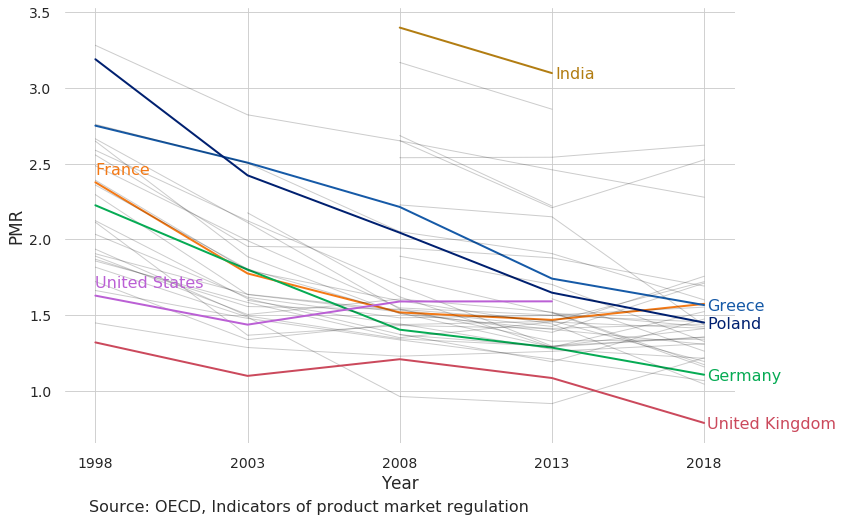

In [101]:
years = df.Year.unique()
fig, ax = plt.subplots(figsize=(12,8))
for country in countries:
    data =df[(df.Country==country)].sort_values('Year')
    alpha_ = .2 if country not in country_select else 1
    color_ = country_color[country]
    linewidth_ = 2 if country in country_select else 1
    last_year = data.Year.max()
    first_year = data.Year.min()
    if country in ['United States','France']:
        loc_ = (first_year,data[data.Year==first_year].PMR.values+.05) 
    else:
        loc_ = (last_year+.1,data[data.Year==last_year].PMR.values-.04) 
    ax.plot(data['Year'],data['PMR'],color=color_,alpha=alpha_,linewidth=linewidth_)
    if country in country_select:
        plt.annotate(country,(loc_),color=country_color[country],fontsize=16);        
ax.set_xlabel('Year');
ax.set_ylabel('PMR');
#ax.set_xlim(right=2019);
#ax.set_title('Product Market Regulation Index')
ax.text(1998-.2,.2,'Source: OECD, Indicators of product market regulation',fontsize=16);
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks(years,years);
plt.savefig('./pmr.svg',bbox_inches='tight')

In [31]:
prod = pd.read_csv('gdp_per_hour_OECD.csv')

In [32]:
prod_UK = prod[prod.LOCATION == 'GBR']

In [44]:
p = np.poly1d(np.polyfit(prod_UK.loc[:1257].TIME,prod_UK.loc[:1257].Value,1))

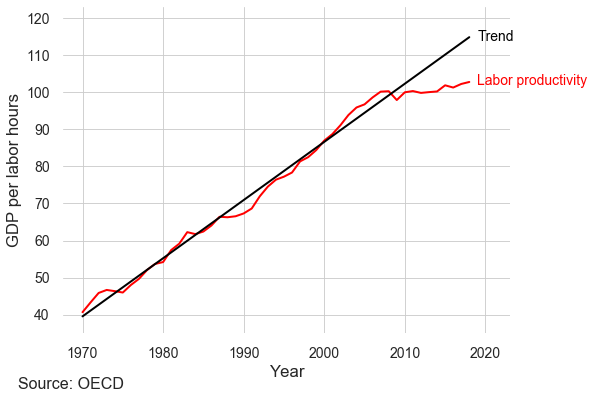

In [83]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(prod_UK.TIME,prod_UK.Value,color='r',linewidth=2)
ax.plot(prod_UK.TIME,p(prod_UK.TIME),color='k',linewidth=2)
ax.annotate('Labor productivity',(2019,102),color='r',fontsize=14)
ax.annotate('Trend',(2019,114),color='k',fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('GDP per labor hours')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlim(xmax=2023)
ax.set_ylim(ymax=123,ymin=35)
ax.text(1962,20,'Source: OECD',fontsize=16);
plt.savefig('./uk_productivity-trend.svg',bbox_inches='tight')

In [70]:
p(2018)/prod_UK.loc[1266].Value-1

0.11759584755213925